In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

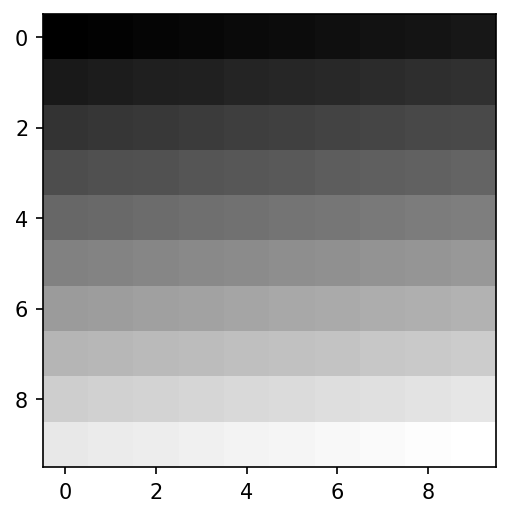

In [2]:
N = 7
s = np.zeros((N,N,))
B0 = 1.5  # T
Gx = 30 / 1000  # T/m
Gy = 30 / 1000  # T/m

def Bx(N):
    _, x = np.mgrid[0:N, 0:N]
    return x * Gx - np.floor(N/2) * Gx

def By(N):
    y, _ = np.mgrid[0:N, 0:N]
    return y * Gy - np.floor(N/2) * Gy

def M_xy(M_0, T_2, gamma, t, G_x, G_y, N):
    return np.ones((N,N,)) * M_0 * np.exp(-t/T_2) * np.exp(-1j*gamma*B)


c = np.sqrt(Bx(N)**2 + By(N)**2)
#plt.imshow(abs(c), cmap="gray")
#plt.show()

M0 = np.arange(100).reshape((10, 10))
M0 = M0 / np.max(M0)
plt.imshow(M0,  cmap="gray", vmin=0, vmax=1)
plt.show()

In [139]:
T2 = M0 * 0.160

B0 = 1.5
gamma = 2.68e8

steps = 150
tstep = 0.0025

m, n = M0.shape
M = M0

global real_signal
global imag_signal
real_signal = np.zeros(shape=(steps, m, n))
imag_signal = np.zeros(shape=(steps, m, n))

real_signal[0] = np.real(M)
imag_signal[0] = np.imag(M)

for i in range(steps-1):
    if i < 15:
        omega = gamma * Bx(n) / 63980.28
    else:
        omega = gamma * Bx(n) / 63980.28

    M = M * np.exp((-tstep/T2)) * np.exp(-1j*omega*tstep)
    M[np.isnan(M)] = 0

    real_signal[i+1] = np.real(M)
    imag_signal[i+1] = np.imag(M)
    
fig, ax = plt.subplots()
y, x = np.mgrid[0:m, 0:n]

def animate(i):
    signal = np.sqrt(np.power(real_signal[i],2) + np.power(imag_signal[i],2))
    plt.cla()
    plt.imshow(signal, cmap="gray", vmin=0, vmax=1)
    ax.quiver(x, y, real_signal[i], imag_signal[i], color="red", angles='xy', scale_units='xy', scale=1/signal.reshape(100,))
    
matplotlib.animation.FuncAnimation(fig, animate, frames=steps)

/var/folders/bm/x1w5b8y51pq_q12xtqqk1qb80000gn/T/ipykernel_16294/3862567240.py:26: RuntimeWarning: divide by zero encountered in true_divide
  M = M * np.exp((-tstep/T2)) * np.exp(-1j*omega*tstep)
/var/folders/bm/x1w5b8y51pq_q12xtqqk1qb80000gn/T/ipykernel_16294/3862567240.py:39: RuntimeWarning: divide by zero encountered in true_divide
  ax.quiver(x, y, real_signal[i], imag_signal[i], color="red", angles='xy', scale_units='xy', scale=1/signal.reshape(100,))


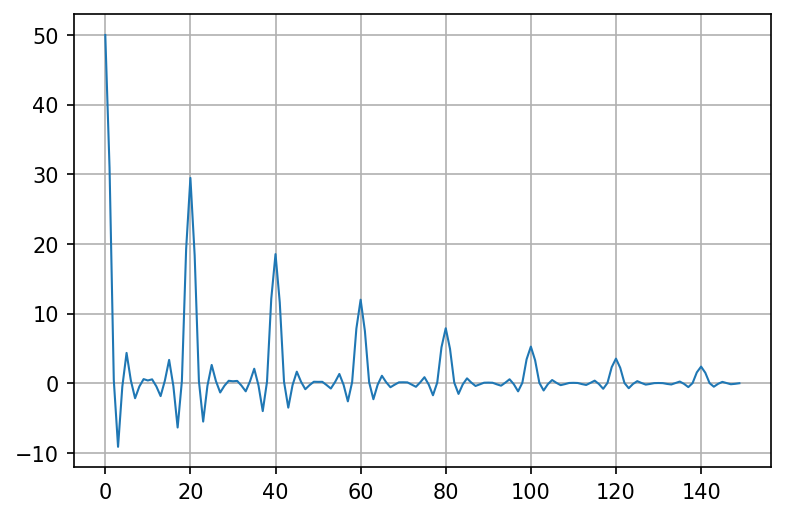

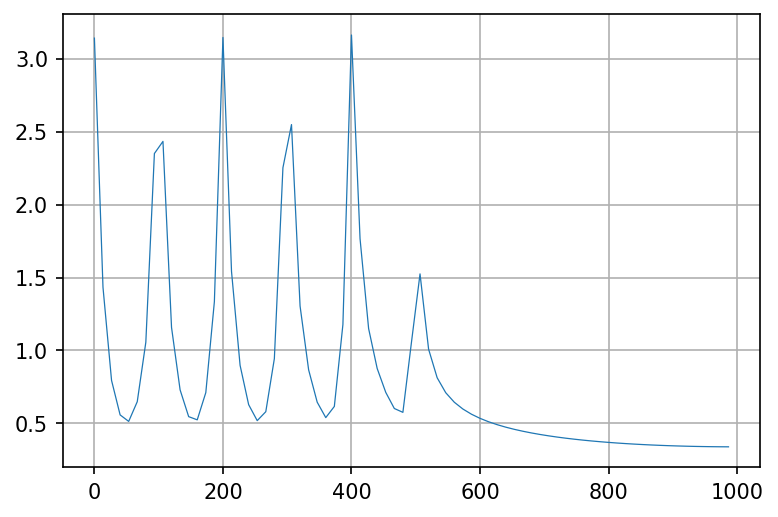

In [140]:
# Gradient echo

plt.close()

signal = np.zeros(steps)

for i in range(steps):
    signal[i] = np.sum(real_signal[i])

fig, ax = plt.subplots()
ax.plot(signal, linewidth=1)

ax.grid()
plt.show()

fig, ax = plt.subplots()
from scipy.fft import fft, fftfreq

N = len(signal)

yf = fft(signal)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), linewidth=0.6)
plt.grid()
plt.show()

In [77]:
T2 = (M0 * 0.160)
fig, ax = plt.subplots()
B0 = 1.5
gamma = 2.68e8
m, n = M0.shape
frames = 50
#B = np.sqrt(B0**2 + By(N)**2)
global signal

M = M0
signal = np.zeros(frames)

def simulate(start_time, stop_time, step):

    time = np.arange(start_time, stop_time, step)
    s_real = np.zeros(shape=time.shape)
    s_imag = np.zeros(shape=time.shape)
    
    for i, t in enumerate(time):
        
        if i < k/4:
            omega = -gamma * Bx(10) / 63980.28
        else:
            omega = gamma * Bx(10) / 63980.28

        # Calculate the magnetization
        M = M * np.exp((-step/T2)) * np.exp(-1j*omega*step)
        M[np.isnan(M)] = 0
        
        s_real[i] = np.sum(np.real(M))
        s_imag[i] = np.sum(np.imag(M))

    return s_real, s_imag

T = 0.0005
s_real, s_imag = simulate(0, 0.75, T)

fig, ax = plt.subplots()
ax.plot(s_real, linewidth=1)
#ax.plot(s_imag)
ax.grid()
plt.show()

def simulate():
    if frame < 4:
        omega = -gamma * Bx(10)
    else:
        omega = gamma * Bx(10)
    plt.cla()
    plt.imshow(np.abs(mag), cmap="gray", vmin=0, vmax=1)
    y, x = np.mgrid[0:n, 0:n]
    print(np.real(mag))
    print(np.imag(mag))
    ax.quiver(x, y, np.real(mag), np.imag(mag), color="red", angles='xy', scale_units='xy', scale=1/np.abs(mag).reshape(100,))

    mag = mag * np.exp((-tstep/T2)) * np.exp(-1j*omega*tstep)
    mag[np.isnan(mag)] = 0
    signal[frame] = np.sum(np.real(mag))

def animate(frame, *args):
    global mag
    tstep = args[0]
    if frame < 4:
        omega = -gamma * Bx(10)
    else:
        omega = gamma * Bx(10)
    plt.cla()
    plt.imshow(np.abs(mag), cmap="gray", vmin=0, vmax=1)
    y, x = np.mgrid[0:n, 0:n]
    print(np.real(mag))
    print(np.imag(mag))
    ax.quiver(x, y, np.real(mag), np.imag(mag), color="red", angles='xy', scale_units='xy', scale=1/np.abs(mag).reshape(100,))

    mag = mag * np.exp((-tstep/T2)) * np.exp(-1j*omega*tstep)
    mag[np.isnan(mag)] = 0
    signal[frame] = np.sum(np.real(mag))
    
matplotlib.animation.FuncAnimation(fig, animate, frames=frames, fargs=[0.000001])

[[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
  0.06060606 0.07070707 0.08080808 0.09090909]
 [0.1010101  0.11111111 0.12121212 0.13131313 0.14141414 0.15151515
  0.16161616 0.17171717 0.18181818 0.19191919]
 [0.2020202  0.21212121 0.22222222 0.23232323 0.24242424 0.25252525
  0.26262626 0.27272727 0.28282828 0.29292929]
 [0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
  0.36363636 0.37373737 0.38383838 0.39393939]
 [0.4040404  0.41414141 0.42424242 0.43434343 0.44444444 0.45454545
  0.46464646 0.47474747 0.48484848 0.49494949]
 [0.50505051 0.51515152 0.52525253 0.53535354 0.54545455 0.55555556
  0.56565657 0.57575758 0.58585859 0.5959596 ]
 [0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
  0.66666667 0.67676768 0.68686869 0.6969697 ]
 [0.70707071 0.71717172 0.72727273 0.73737374 0.74747475 0.75757576
  0.76767677 0.77777778 0.78787879 0.7979798 ]
 [0.80808081 0.81818182 0.82828283 0.83838384 0.84848485 0.85858586
  0.86868687

/var/folders/bm/x1w5b8y51pq_q12xtqqk1qb80000gn/T/ipykernel_16294/728747424.py:25: RuntimeWarning: divide by zero encountered in true_divide
  ax.quiver(x, y, np.real(mag), np.imag(mag), color="red", angles='xy', scale_units='xy', scale=1/np.abs(mag).reshape(100,))
/var/folders/bm/x1w5b8y51pq_q12xtqqk1qb80000gn/T/ipykernel_16294/728747424.py:27: RuntimeWarning: divide by zero encountered in true_divide
  mag = mag * np.exp((-tstep/T2)) * np.exp(-1j*omega*tstep)


[[ 0.         -0.00619295 -0.02007554 -0.01330026  0.02138552  0.0504863
   0.03208325 -0.03104492 -0.08035809 -0.0558286 ]
 [ 0.03475464 -0.06823751 -0.12054646 -0.05766191  0.07487414  0.1514964
   0.08557187 -0.07540657 -0.18082902 -0.11787316]
 [ 0.06951573 -0.13028208 -0.22101739 -0.10202357  0.12836277  0.2525065
   0.13906049 -0.11976823 -0.28129995 -0.17991773]
 [ 0.10427683 -0.19232665 -0.32148832 -0.14638522  0.18185139  0.3535166
   0.19254911 -0.16412988 -0.38177088 -0.2419623 ]
 [ 0.13903792 -0.25437122 -0.42195925 -0.19074687  0.23534001  0.4545267
   0.24603774 -0.20849153 -0.4822418  -0.30400687]
 [ 0.17379901 -0.31641578 -0.52243017 -0.23510852  0.28882863  0.55553681
   0.29952636 -0.25285318 -0.58271273 -0.36605144]
 [ 0.2085601  -0.37846035 -0.6229011  -0.27947017  0.34231726  0.65654691
   0.35301498 -0.29721483 -0.68318366 -0.42809601]
 [ 0.2433212  -0.44050492 -0.72337203 -0.32383183  0.39580588  0.75755701
   0.4065036  -0.34157649 -0.78365459 -0.49014058]
 [ 0.

[[ 0.         -0.00617764 -0.02005072 -0.0132893   0.02137229  0.05046132
   0.03207001 -0.03103395 -0.08033324 -0.05581325]
 [ 0.03474604 -0.06822216 -0.1205216  -0.05765094  0.07486091  0.15147141
   0.08555863 -0.0753956  -0.18080416 -0.11785781]
 [ 0.06950713 -0.13026672 -0.22099253 -0.10201259  0.12834953  0.25248151
   0.13904725 -0.11975725 -0.28127508 -0.17990238]
 [ 0.10426822 -0.19231129 -0.32146345 -0.14637424  0.18183815  0.35349161
   0.19253588 -0.1641189  -0.38174601 -0.24194695]
 [ 0.13902932 -0.25435586 -0.42193438 -0.19073589  0.23532677  0.45450171
   0.2460245  -0.20848055 -0.48221694 -0.30399151]
 [ 0.17379041 -0.31640043 -0.52240531 -0.23509754  0.2888154   0.55551181
   0.29951312 -0.2528422  -0.58268787 -0.36603608]
 [ 0.2085515  -0.378445   -0.62287624 -0.27945919  0.34230402  0.65652191
   0.35300174 -0.29720386 -0.68315879 -0.42808065]
 [ 0.24331259 -0.44048957 -0.72334716 -0.32382085  0.39579264  0.75753201
   0.40649037 -0.34156551 -0.78362972 -0.49012522]


[[ 0.          0.00738106  0.01066138 -0.02816599 -0.00745992  0.05043635
  -0.01119623 -0.06580591  0.04275451  0.06683269]
 [-0.08092216  0.08169563  0.06414995 -0.12226583 -0.02614147  0.15144642
  -0.02987778 -0.15990578  0.09624312  0.1411474 ]
 [-0.16189941  0.15601034  0.11763857 -0.21636571 -0.04482303  0.25245651
  -0.04855934 -0.25400566  0.14973174  0.21546212]
 [-0.24287666  0.23032506  0.17112719 -0.31046559 -0.06350458  0.35346661
  -0.0672409  -0.34810555  0.20322036  0.28977684]
 [-0.32385391  0.30463979  0.22461581 -0.40456548 -0.08218614  0.45447671
  -0.08592245 -0.44220544  0.25670899  0.36409156]
 [-0.40483117  0.37895451  0.27810444 -0.49866537 -0.1008677   0.55548681
  -0.10460401 -0.53630532  0.31019761  0.43840628]
 [-0.48580843  0.45326923  0.33159306 -0.59276526 -0.11954926  0.65649691
  -0.12328557 -0.63040521  0.36368623  0.51272101]
 [-0.56678568  0.52758395  0.38508168 -0.68686514 -0.13823082  0.75750701
  -0.14196713 -0.7245051   0.41717485  0.58703573]


[[ 0.         -0.00837778  0.00692003  0.00862072 -0.03231583  0.05041139
  -0.04851125  0.02015059  0.02777663 -0.07602461]
 [ 0.10072293 -0.09293639  0.04168106  0.03744544 -0.11329303  0.15142143
  -0.12948847  0.04897534  0.06253771 -0.16058353]
 [ 0.20153937 -0.17749532  0.07644215  0.06627019 -0.19427027  0.25243152
  -0.21046572  0.07780009  0.0972988  -0.24514247]
 [ 0.30235583 -0.26205425  0.11120324  0.09509495 -0.27524752  0.35344162
  -0.29144298  0.10662485  0.13205989 -0.3297014 ]
 [ 0.40317228 -0.34661319  0.14596433  0.1239197  -0.35622478  0.45445171
  -0.37242023  0.1354496   0.16682099 -0.41426035]
 [ 0.50398874 -0.43117213  0.18072542  0.15274446 -0.43720203  0.55546181
  -0.45339748  0.16427436  0.20158208 -0.49881929]
 [ 0.6048052  -0.51573108  0.21548651  0.18156921 -0.51817929  0.65647191
  -0.53437474  0.19309912  0.23634317 -0.58337823]
 [ 0.70562166 -0.60029002  0.25024761  0.21039397 -0.59915654  0.75748201
  -0.61535199  0.22192387  0.27110426 -0.66793717]


[[ 0.          0.00914169 -0.01912565  0.02954176 -0.04007043  0.05038644
  -0.06016456  0.06908529 -0.07684061  0.08313949]
 [-0.08771325  0.10163907 -0.11531739  0.12840074 -0.14054123  0.15139645
  -0.16063541  0.1679444  -0.17303258  0.17563741]
 [-0.17552964  0.194137   -0.21150938  0.22725988 -0.24101214  0.25240653
  -0.26110632  0.26680355 -0.26922458  0.26813535]
 [-0.26334605  0.28663494 -0.30770138  0.32611904 -0.34148306  0.35341662
  -0.36157724  0.3656627  -0.36541659  0.3606333 ]
 [-0.35116247  0.3791329  -0.40389339  0.4249782  -0.44195398  0.45442672
  -0.46204817  0.46452186 -0.4616086   0.45313126]
 [-0.43897889  0.47163085 -0.50008541  0.52383736 -0.54242491  0.55543682
  -0.56251909  0.56338102 -0.55780062  0.54562921]
 [-0.52679531  0.5641288  -0.59627742  0.62269652 -0.64289583  0.65644692
  -0.66299002  0.66224019 -0.65399263  0.63812717]
 [-0.61461174  0.65662676 -0.69246943  0.72155568 -0.74336676  0.75745702
  -0.76346094  0.76109935 -0.75018464  0.73062512]


[[ 0.         -0.00965317  0.01656354 -0.00373287 -0.02664855  0.0503615
  -0.04002026 -0.00873366  0.06660869 -0.08798457]
 [ 0.04614597 -0.10756761  0.0999723  -0.01623489 -0.09350726  0.15137147
  -0.10687902 -0.02123571  0.15001775 -0.18589984]
 [ 0.09235763 -0.2054829   0.18338138 -0.02873694 -0.16036608  0.25238154
  -0.17373784 -0.03373776  0.23342684 -0.28381516]
 [ 0.13856931 -0.30339822  0.26679048 -0.04123899 -0.2272249   0.35339163
  -0.24059667 -0.04623981  0.31683594 -0.38173048]
 [ 0.18478099 -0.40131355  0.35019959 -0.05374104 -0.29408373  0.45440173
  -0.30745549 -0.05874186  0.40024505 -0.47964581]
 [ 0.23099267 -0.49922888  0.43360869 -0.06624309 -0.36094256  0.55541182
  -0.37431432 -0.07124392  0.48365416 -0.57756114]
 [ 0.27720436 -0.59714421  0.5170178  -0.07874515 -0.42780139  0.65642192
  -0.44117315 -0.08374597  0.56706327 -0.67547648]
 [ 0.32341604 -0.69505954  0.60042691 -0.0912472  -0.49466022  0.75743202
  -0.50803198 -0.09624802  0.65047238 -0.77339181]
 

[[ 0.00000000e+00  9.89956519e-03 -1.24448410e-03 -3.01088793e-02
   8.33605513e-04  5.03365821e-02  1.25215029e-03 -7.04779661e-02
  -5.00922030e-03  9.04290362e-02]
 [ 1.04282842e-02  1.10561686e-01 -7.51906260e-03 -1.31031905e-01
   2.92633631e-03  1.51346495e-01  3.34488325e-03 -1.71401234e-01
  -1.12838291e-02  1.91092344e-01]
 [ 2.08739974e-02  2.11225015e-01 -1.37936741e-02 -2.31955244e-01
   5.01907144e-03  2.52356559e-01  5.43761854e-03 -2.72324589e-01
  -1.75584422e-02  2.91755709e-01]
 [ 3.13197154e-02  3.11888384e-01 -2.00682878e-02 -3.32878611e-01
   7.11180708e-03  3.53366644e-01  7.53035423e-03 -3.73247961e-01
  -2.38330562e-02  3.92419086e-01]
 [ 4.17654347e-02  4.12551763e-01 -2.63429020e-02 -4.33801988e-01
   9.20454288e-03  4.54376736e-01  9.62309005e-03 -4.74171339e-01
  -3.01076706e-02  4.93082469e-01]
 [ 5.22111544e-02  5.13215146e-01 -3.26175164e-02 -5.34725367e-01
   1.12972788e-02  5.55386831e-01  1.17158259e-02 -5.75094720e-01
  -3.63822852e-02  5.93745854e-01

[[ 0.         -0.00987547 -0.01499566 -0.00124049  0.02784143  0.05031167
   0.04182895 -0.00290506 -0.06041566 -0.0904076 ]
 [-0.06357854 -0.110541   -0.09069594 -0.00540194  0.09777935  0.15132153
   0.11176697 -0.00706653 -0.13611642 -0.1910747 ]
 [-0.1272791  -0.21120813 -0.16639674 -0.00956341  0.16771746  0.25233158
   0.18170509 -0.011228   -0.21181725 -0.29174187]
 [-0.19097969 -0.31187531 -0.24209758 -0.01372489  0.2376556   0.35334166
   0.25164322 -0.01538948 -0.28751809 -0.39240906]
 [-0.25468029 -0.4125425  -0.31779843 -0.01788636  0.30759374  0.45435175
   0.32158137 -0.01955095 -0.36321894 -0.49307626]
 [-0.31838089 -0.5132097  -0.39349928 -0.02204783  0.37753188  0.55536184
   0.39151951 -0.02371242 -0.43891979 -0.59374346]
 [-0.3820815  -0.6138769  -0.46920013 -0.02620931  0.44747003  0.65637194
   0.46145766 -0.0278739  -0.51462064 -0.69441066]
 [-0.44578211 -0.7145441  -0.54490099 -0.03037078  0.51740817  0.75738203
   0.5313958  -0.03203537 -0.5903215  -0.79507787]


[[0.         0.00958288 0.01964053 0.02985459 0.04010884 0.05028677
  0.06027194 0.06994866 0.07920274 0.0879222 ]
 [0.09599799 0.10750749 0.11891136 0.13009027 0.14092488 0.15129656
  0.16108815 0.17018474 0.17847437 0.18584874]
 [0.192204   0.20543407 0.21818306 0.23032648 0.24174127 0.2523066
  0.26190456 0.27042097 0.27774611 0.28377538]
 [0.28841007 0.30336072 0.31745482 0.33056273 0.34255771 0.35331667
  0.36272099 0.37065723 0.37701788 0.38170205]
 [0.38461617 0.40128738 0.41672659 0.43079899 0.44337415 0.45432676
  0.46353744 0.4708935  0.47628965 0.47962872]
 [0.48082228 0.49921405 0.51599837 0.53103527 0.5441906  0.55533685
  0.56435389 0.57112978 0.57556144 0.57755539]
 [0.57702838 0.59714072 0.61527015 0.63127154 0.64500705 0.65634694
  0.66517035 0.67136605 0.67483322 0.67548207]
 [0.67323449 0.6950674  0.71454193 0.73150782 0.74582351 0.75735704
  0.7659868  0.77160233 0.77410501 0.77340874]
 [0.7694406  0.79299408 0.81381372 0.8317441  0.84663997 0.85836714
  0.86680326 

[[ 0.         -0.00903107 -0.00913962  0.00616369  0.03117391  0.05026189
   0.046855    0.01444819 -0.03689079 -0.08304192]
 [-0.09713943 -0.10154517 -0.05539185  0.02687509  0.10957987  0.1512716
   0.12526113  0.0351597  -0.08314349 -0.17555829]
 [-0.1945134  -0.19406158 -0.1016446   0.04758662  0.18798617  0.25228162
   0.20366744  0.05587124 -0.12939626 -0.26807476]
 [-0.29188748 -0.28657806 -0.14789738  0.06829817  0.26639251  0.35329169
   0.28207378  0.07658279 -0.17564905 -0.36059126]
 [-0.38926157 -0.37909456 -0.19415016  0.08900972  0.34479886  0.45430177
   0.36048013  0.09729434 -0.22190183 -0.45310777]
 [-0.48663568 -0.47161108 -0.24040295  0.10972127  0.42320522  0.55531186
   0.43888649  0.11800589 -0.26815463 -0.54562429]
 [-0.58400979 -0.56412759 -0.28665574  0.13043282  0.50161158  0.65632195
   0.51729285  0.13871744 -0.31440742 -0.63814081]
 [-0.6813839  -0.65664411 -0.33290854  0.15114437  0.58001794  0.75733205
   0.59569921  0.159429   -0.36066021 -0.73065733]
 

[[ 0.          0.00823634 -0.00837801 -0.02878852  0.00578266  0.05023701
   0.00869325 -0.0675145  -0.03384807  0.07590109]
 [ 0.06664661  0.09281787 -0.05082843 -0.12560423  0.02033571  0.15124664
   0.02324633 -0.1643308  -0.07629901  0.16048514]
 [ 0.13347066  0.17740197 -0.09327941 -0.2224207   0.03488883  0.25225665
   0.03779946 -0.26114731 -0.11875002  0.24506931]
 [ 0.20029478  0.26198615 -0.13573043 -0.31923724  0.04944196  0.35326671
   0.05235259 -0.35796386 -0.16120105  0.32965351]
 [ 0.26711893  0.34657035 -0.17818146 -0.4160538   0.0639951   0.45427678
   0.06690572 -0.45478042 -0.20365208  0.41423772]
 [ 0.33394308  0.43115456 -0.2206325  -0.51287036  0.07854823  0.55528687
   0.08145886 -0.55159699 -0.24610312  0.49882194]
 [ 0.40076724  0.51573878 -0.26308353 -0.60968694  0.09310137  0.65629696
   0.09601199 -0.64841357 -0.28855416  0.58340616]
 [ 0.4675914   0.600323   -0.30553457 -0.70650351  0.1076545   0.75730706
   0.11056513 -0.74523015 -0.3310052   0.66799038]


[[ 0.         -0.00722151  0.01939653 -0.0109029  -0.02263183  0.05021215
  -0.03403011 -0.02558141  0.07843688 -0.06669557]
 [-0.01446525 -0.08156471  0.11779796 -0.04759951 -0.07962382  0.15122169
  -0.09102228 -0.06227828  0.17683974 -0.14104142]
 [-0.0289726  -0.15591061  0.21620096 -0.08429646 -0.13661617  0.25223167
  -0.14801465 -0.09897525  0.27524282 -0.21538739]
 [-0.04347997 -0.23025659  0.31460406 -0.12099345 -0.19360856  0.35324173
  -0.20500704 -0.13567224  0.37364593 -0.28973339]
 [-0.05798735 -0.3046026   0.41300718 -0.15769044 -0.25060097  0.4542518
  -0.26199945 -0.17236924  0.47204907 -0.36407941]
 [-0.07249473 -0.37894861  0.51141032 -0.19438744 -0.30759338  0.55526188
  -0.31899186 -0.20906624  0.57045221 -0.43842543]
 [-0.0870021  -0.45329463  0.60981346 -0.23108444 -0.3645858   0.65627197
  -0.37598428 -0.24576324  0.66885535 -0.51277145]
 [-0.10150948 -0.52764066  0.70821661 -0.26778144 -0.42157821  0.75728206
  -0.4329767  -0.28246024  0.7672585  -0.58711748]
 

375.0
[[-628.31860067 -502.65488054 -376.9911604  -251.32744027 -125.66372013
     0.          125.66372013  251.32744027  376.9911604   502.65488054]
 [-628.31860067 -502.65488054 -376.9911604  -251.32744027 -125.66372013
     0.          125.66372013  251.32744027  376.9911604   502.65488054]
 [-628.31860067 -502.65488054 -376.9911604  -251.32744027 -125.66372013
     0.          125.66372013  251.32744027  376.9911604   502.65488054]
 [-628.31860067 -502.65488054 -376.9911604  -251.32744027 -125.66372013
     0.          125.66372013  251.32744027  376.9911604   502.65488054]
 [-628.31860067 -502.65488054 -376.9911604  -251.32744027 -125.66372013
     0.          125.66372013  251.32744027  376.9911604   502.65488054]
 [-628.31860067 -502.65488054 -376.9911604  -251.32744027 -125.66372013
     0.          125.66372013  251.32744027  376.9911604   502.65488054]
 [-628.31860067 -502.65488054 -376.9911604  -251.32744027 -125.66372013
     0.          125.66372013  251.32744027  376.991

/var/folders/bm/x1w5b8y51pq_q12xtqqk1qb80000gn/T/ipykernel_16294/2799937811.py:20: RuntimeWarning: invalid value encountered in true_divide
  M = M0 * np.exp((-t/T2)) * np.exp(-1j*omega*t)
/var/folders/bm/x1w5b8y51pq_q12xtqqk1qb80000gn/T/ipykernel_16294/2799937811.py:20: RuntimeWarning: divide by zero encountered in true_divide
  M = M0 * np.exp((-t/T2)) * np.exp(-1j*omega*t)


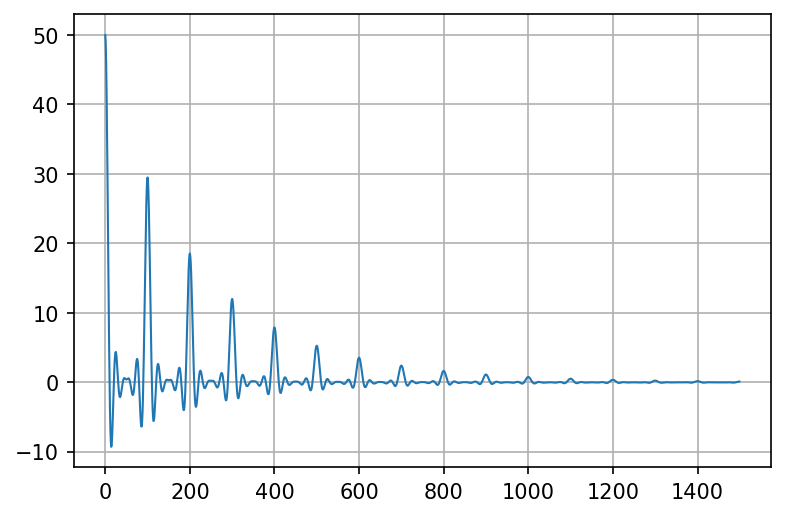

In [42]:
def simulate(start_time, stop_time, step):

    time = np.arange(start_time, stop_time, step)
    s_real = np.zeros(shape=time.shape)
    s_imag = np.zeros(shape=time.shape)
    
    k = len(time)

    print(k/4)
    print(gamma*Bx(10)/ 63980.28)
    
    for i, t in enumerate(time):
        
        if i < k/4:
            omega = -gamma * Bx(10) / 63980.28
        else:
            omega = gamma * Bx(10) / 63980.28

        # Calculate the magnetization
        M = M0 * np.exp((-t/T2)) * np.exp(-1j*omega*t)
        #M = M0  * np.exp(-1j*omega*t)
        M[np.isnan(M)] = 0
        
        s_real[i] = np.sum(np.real(M))
        s_imag[i] = np.sum(np.imag(M))

    return s_real, s_imag

T = 0.0005
s_real, s_imag = simulate(0, 0.75, T)

fig, ax = plt.subplots()
ax.plot(s_real, linewidth=1)
#ax.plot(s_imag)
ax.grid()
plt.show()

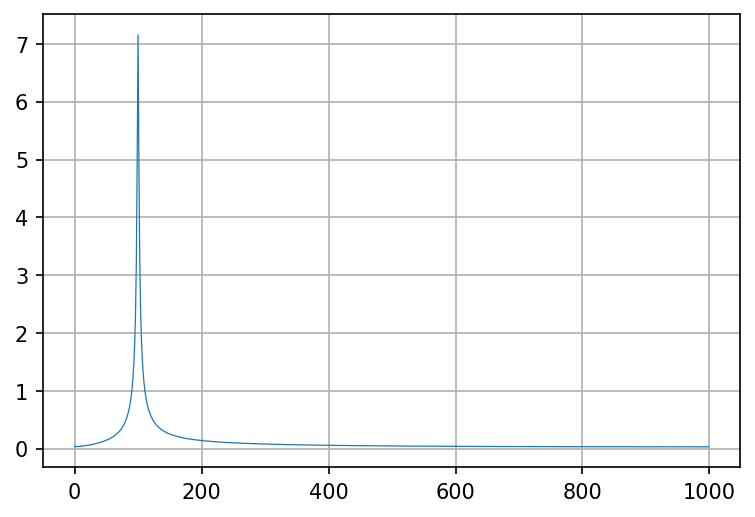

In [77]:
from scipy.fft import fft, fftfreq

N = len(s_real)

yf = fft(s_real)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), linewidth=0.6)
plt.grid()
plt.show()

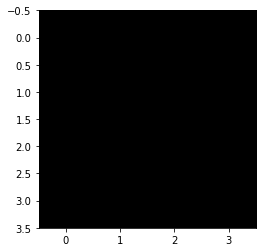

In [48]:
s[0][0] = 0
plt.imshow(abs(s), cmap="gray")

In [70]:
b, b = np.mgrid[-2:3, -2:3]

In [71]:
a

array([[-2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2]])

In [72]:
b

array([[-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2]])

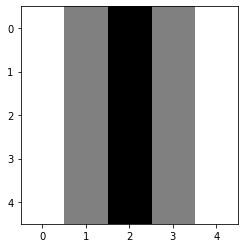

In [73]:
plt.imshow(abs(b), cmap="gray")

In [80]:
np.indices((N,N))

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [89]:
print(np.floor(5/2))

2.0
